In [2]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 깔금한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 불필요한 경고를 무시합니다 (사이파이 이슈 #5998 참조)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [3]:
import os
import numpy as np

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
sn.set()

# 한글출력
matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

In [4]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [5]:
fetch_housing_data()

In [6]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [7]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


그림 저장: attribute_histogram_plots


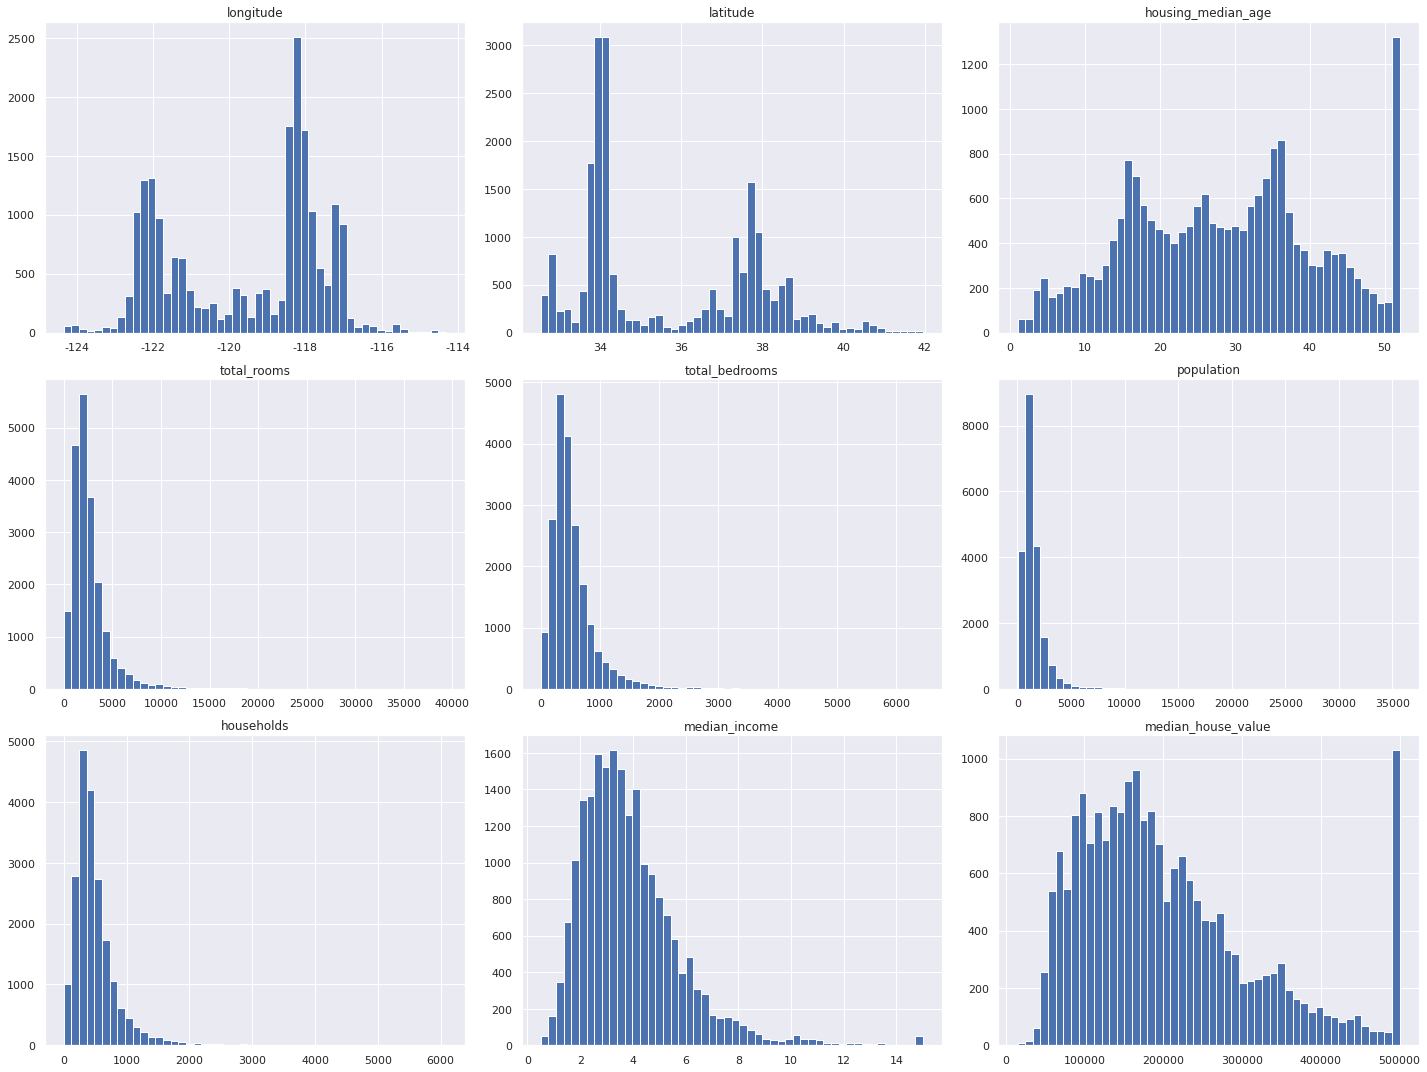

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

### 2.3.4 테스트, 세트 만들기

#### 1)np.random.permutaion을 이용해 Train/Test set 나누기

In [12]:
np.random.seed(42)
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
train_set, test_set = split_train_test(housing, 0.2)
print(f"train_set :{len(train_set)}")
print(f"test_set :{len(test_set)}")

train_set :16512
test_set :4128


#### 2)zilb의 crc32를 이용한 Train/Test set 나누기

In [14]:
from zlib import crc32
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [15]:
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")
print(f"train_set :{len(train_set)}")
print(f"test_set :{len(test_set)}")

train_set :16512
test_set :4128


In [16]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
16,16,-122.27,37.85,52.0,1966.0,347.0,793.0,331.0,2.7750,152500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY


#### 3)sklearn의 train_test_split을 이용한 Train/Test set 나누기

In [17]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"train_set :{len(train_set)}")
print(f"test_set :{len(test_set)}")

train_set :16512
test_set :4128


In [18]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


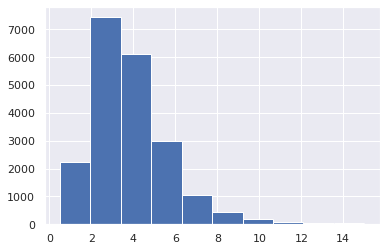

In [19]:
housing["median_income"].hist()
plt.show()

In [20]:
housing["income_cat"] = pd.cut(housing["median_income"],
                                  bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                  labels=[1, 2, 3, 4, 5])

In [21]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

#### 4)sklearn의 StratifiedShuffleSplit을 이용한 Train/Test set 나누기

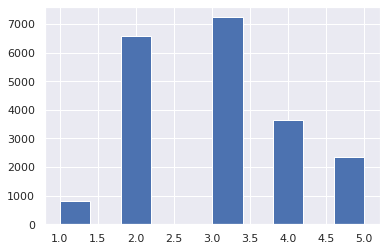

In [22]:
housing["income_cat"].hist()
plt.show()

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [24]:
display(housing["income_cat"].value_counts() / len(housing))
print("="*20)
display(strat_test_set["income_cat"].value_counts() / len(strat_test_set))

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [25]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "전체" : income_cat_proportions(housing),
    "계층 샘플링" : income_cat_proportions(strat_test_set),
    "무작위 샘플링" : income_cat_proportions(test_set),
}).sort_index()
compare_props["무작위. %error"] = 100 * compare_props["무작위 샘플링"] / compare_props["전체"] - 100
compare_props["계층. %error"] = 100 * compare_props["계층 샘플링"] / compare_props["전체"] - 100

In [26]:
compare_props

,전체,계층 샘플링,무작위 샘플링,무작위. %error,계층. %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


In [27]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

### 2.4 데이터 이해를 위한 탐색과 시각화

In [28]:
housing = strat_train_set.copy()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


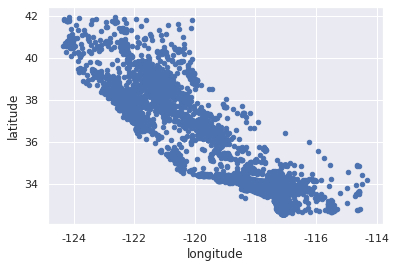

In [29]:
housing.plot(kind="scatter", x="longitude", y="latitude")
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

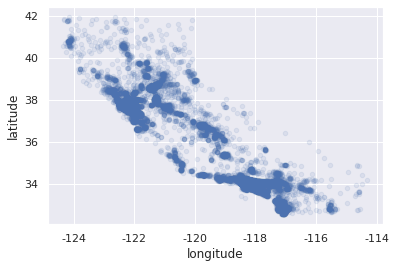

In [30]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

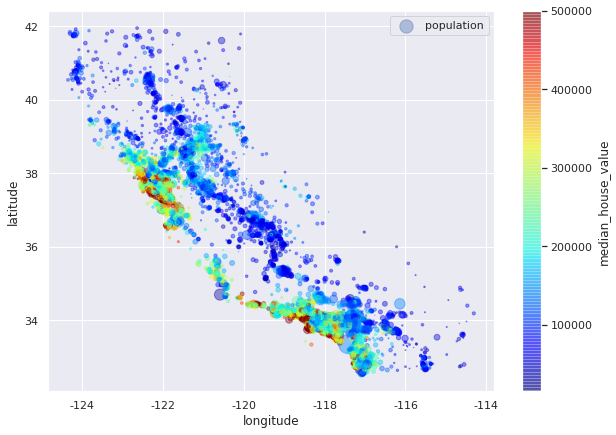

In [31]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10, 7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.legend()

In [32]:
# Download the California image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\end_to_end_project\\california.png',
 <http.client.HTTPMessage at 0x22a02b8a640>)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


그림 저장: california_housing_prices_plot


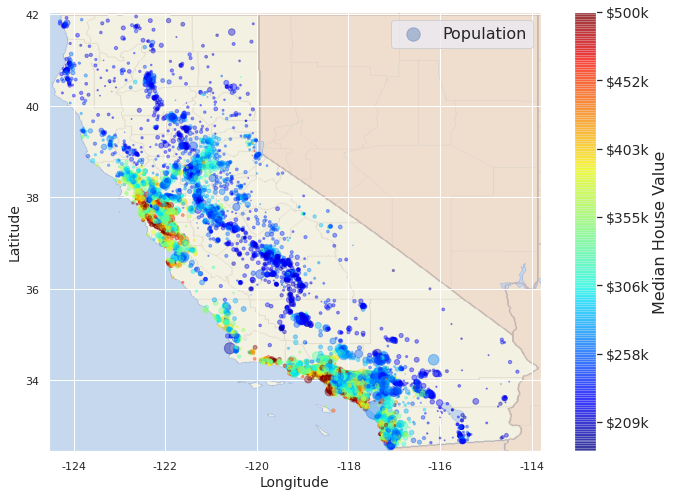

In [33]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

In [34]:
corr_matrix = housing.corr()

In [35]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

### 2.4.2 상관관계 조사

In [36]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


그림 저장: scatter_matrix_plot


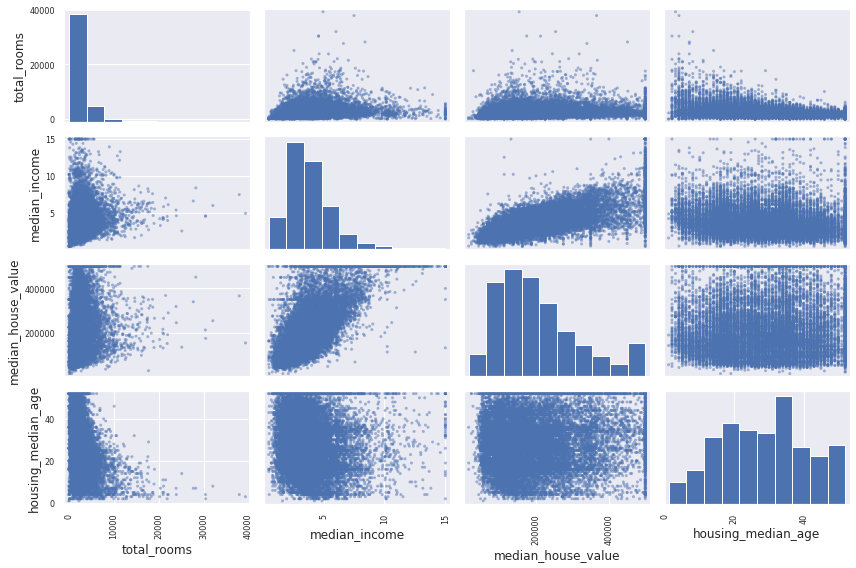

In [37]:
# 상관계수는 선형적인 상관관계만 측정한다. 비선형적인 관계는 잡을 수 없다

from pandas.plotting import scatter_matrix

attributes = ['total_rooms','median_income', 'median_house_value','housing_median_age']
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

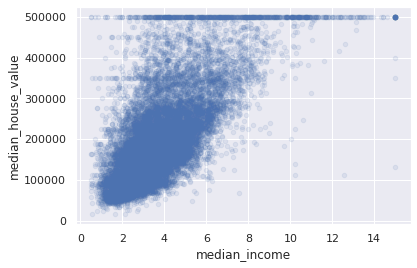

In [39]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

### 2.4.3 특성 조합으로 실험

In [40]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [43]:
corr_martix = housing.corr()
corr_martix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


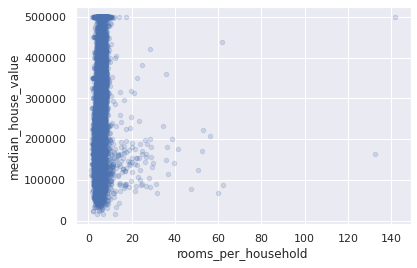

In [44]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value", alpha=0.2)
plt.show()

In [46]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724,5.440341,0.212878,3.096437
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830,2.611712,0.057379,11.584826
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000,4.442040,0.175304,2.431287
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000,5.232284,0.203031,2.817653
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000,6.056361,0.239831,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


### 2.5 머신러닝 알고리즘을 위한 데이터 준비

In [47]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [48]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [49]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [50]:
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [51]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [52]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [55]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [56]:
X = imputer.transform(housing_num)

In [57]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

### 2.5.2 턱스트와 범주형 특성 다루기

In [58]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [59]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [60]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [61]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [62]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [63]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### 2.5.3 나만의 변환기

In [66]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, households_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [67]:
colnames = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix =[
    housing.columns.get_loc(c) for c in colnames]

In [69]:
# 사이킷런을 사용하면 열 이름이 없는 넘파이 배열로 나온다. 데이터 프레임으로 복원하기

housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns) + ["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,4.625369,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,6.008850,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,4.225108,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,5.232295,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,4.505810,3.047847


### 2.5.4 특성 스케일링

In [72]:
# 훈련데이터에만 fit 하고 테스트데이터에는 transform만 한다.
# min-max : 최솟값을 빼고 최댓값과 최솟값의 차이로 빼서 0과 1사이에 위치하게 함
# 표준화 : 이상치에 대해 둔감

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [73]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871, -0.1215581 ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.26453207],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499, -0.15013227],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414,  0.06597972],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.06408293],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294, -0.06430388]])

In [77]:
housing_num_tr.shape

(16512, 11)

In [79]:
list(housing_num)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [74]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

In [75]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [80]:
housing_prepared.shape

(16512, 16)

### 2.6 모델 선택과 훈련
### 2.6.1 훈련 세트에서 훈련하고 평가하기

In [81]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [83]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("예측 : ", lin_reg.predict(some_data_prepared))
print("레이블", list(some_labels))

예측 :  [211881.21811279 321219.24211009 210877.63065012  62198.25451316
 194847.8414579 ]
레이블 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [84]:
# RMSE 측정
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse  # 과소적합

68911.49637588045

In [85]:
from sklearn.metrics import mean_absolute_error\

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49869.240565697444

In [86]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [87]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse   # 과대적합

0.0

### 모델 세부 튜닝

In [89]:
# tree 모델
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [91]:
def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준편차:", scores.std())
    
display_scores(tree_rmse_scores) # 과대 적합

점수: [71111.22486285 70216.13755946 70682.77595021 72959.07421063
 70596.60523472 75054.51954481 74456.42223662 69424.97043901
 77137.27159169 70502.31825281]
평균: 72214.13198828092
표준편차: 2424.200236985265


In [96]:
# 회귀 모델
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

점수: [67474.11780426 67233.22466524 69301.86479972 74716.01783105
 68426.80214612 71609.98356263 65200.14338307 68687.78826919
 72262.43484426 68111.81213342]
평균: 69302.41894389637
표준편차: 2653.460699447044


In [109]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [110]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18691.045963678174

In [111]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

점수: [49787.83852363 47438.6208977  50269.21005285 52607.28207582
 49256.79639504 53677.19462854 49036.85164055 47946.32915586
 53360.43056986 50660.12064941]
평균: 50404.06745892627
표준편차: 2068.597294766785


In [113]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     69302.418944
std       2796.993164
min      65200.143383
25%      67633.541387
50%      68557.295208
75%      71032.953872
max      74716.017831
dtype: float64

In [116]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111571.89454322006

In [119]:
# 그리드 탐색

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators' : [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators' : [3, 10], 'max_features' : [2, 3, 4]}
]
forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [121]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [122]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [123]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

65057.6367011754 {'max_features': 2, 'n_estimators': 3}
55458.882453941194 {'max_features': 2, 'n_estimators': 10}
53051.18712904196 {'max_features': 2, 'n_estimators': 30}
60390.60667511211 {'max_features': 4, 'n_estimators': 3}
52430.76148375605 {'max_features': 4, 'n_estimators': 10}
50125.81443168933 {'max_features': 4, 'n_estimators': 30}
58465.31719067378 {'max_features': 6, 'n_estimators': 3}
51960.96252833072 {'max_features': 6, 'n_estimators': 10}
50074.05583534389 {'max_features': 6, 'n_estimators': 30}
58350.66560712871 {'max_features': 8, 'n_estimators': 3}
52582.094706782664 {'max_features': 8, 'n_estimators': 10}
49796.488984902244 {'max_features': 8, 'n_estimators': 30}
63279.07571368587 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54742.41809409313 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59273.97984539481 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52253.6116660728 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [124]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.039464,0.000859,0.002393,4.797590e-04,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.844325e+09,-4.558245e+09,...,-4.232496e+09,2.761337e+08,18,-1.115961e+09,-1.173733e+09,-1.133396e+09,-1.184175e+09,-1.118195e+09,-1.145092e+09,2.848403e+07
1,0.133922,0.001471,0.007207,4.004480e-04,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.841996e+09,-3.237004e+09,...,-3.075688e+09,2.024817e+08,11,-5.855017e+08,-5.976001e+08,-5.676994e+08,-5.948483e+08,-5.845597e+08,-5.860418e+08,1.048887e+07
2,0.404210,0.002491,0.020418,1.020581e-03,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.594414e+09,-2.918044e+09,...,-2.814428e+09,1.715236e+08,9,-4.480930e+08,-4.412281e+08,-4.392422e+08,-4.464524e+08,-4.379736e+08,-4.425979e+08,3.989349e+06
3,0.065860,0.001601,0.002402,4.900961e-04,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.655348e+09,-3.806942e+09,...,-3.647025e+09,1.476672e+08,16,-1.009304e+09,-9.802666e+08,-9.647966e+08,-9.829097e+08,-1.005031e+09,-9.884616e+08,1.653460e+07
4,0.214720,0.001336,0.007607,4.903492e-04,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.527769e+09,-2.911820e+09,...,-2.748985e+09,1.581967e+08,7,-5.234647e+08,-5.119605e+08,-5.053558e+08,-5.277209e+08,-5.194284e+08,-5.175861e+08,8.023634e+06
5,0.650796,0.004876,0.020819,4.003287e-04,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.307747e+09,-2.629550e+09,...,-2.512597e+09,1.590769e+08,3,-3.903429e+08,-3.834990e+08,-3.840501e+08,-3.966812e+08,-3.823631e+08,-3.873873e+08,5.414981e+06
6,0.086879,0.001941,0.002803,4.001379e-04,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.108276e+09,-3.500227e+09,...,-3.418193e+09,1.775551e+08,13,-9.457117e+08,-8.829835e+08,-8.752106e+08,-9.561821e+08,-8.939788e+08,-9.108133e+08,3.347140e+07
7,0.295574,0.003482,0.007607,4.902324e-04,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.430394e+09,-2.847300e+09,...,-2.699942e+09,1.721816e+08,4,-4.939842e+08,-4.861634e+08,-4.831734e+08,-5.130327e+08,-4.919484e+08,-4.936604e+08,1.043555e+07
8,0.891875,0.010955,0.021019,1.096497e-03,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.321452e+09,-2.637616e+09,...,-2.507411e+09,1.512702e+08,2,-3.863392e+08,-3.764000e+08,-3.756379e+08,-3.922569e+08,-3.832880e+08,-3.827844e+08,6.236221e+06
9,0.110901,0.000981,0.002602,4.904270e-04,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.291792e+09,-3.593412e+09,...,-3.404800e+09,1.123287e+08,12,-9.185843e+08,-8.955026e+08,-8.891914e+08,-9.098863e+08,-8.959230e+08,-9.018175e+08,1.077286e+07


In [126]:
### 2.7.2 랜덤 탐색

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators' : randint(low=1, high=200),
    'max_features' : randint(low=1, high=8)
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022A033FA4C0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022A05DE1DF0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [127]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

48879.29503544632 {'max_features': 7, 'n_estimators': 180}
51520.93505538564 {'max_features': 5, 'n_estimators': 15}
50369.37167852501 {'max_features': 3, 'n_estimators': 72}
50417.0990063525 {'max_features': 5, 'n_estimators': 21}
48933.58163696999 {'max_features': 7, 'n_estimators': 122}
50361.13011228164 {'max_features': 3, 'n_estimators': 75}
50309.575816299555 {'max_features': 3, 'n_estimators': 88}
49231.732870994034 {'max_features': 5, 'n_estimators': 100}
50159.83989266944 {'max_features': 3, 'n_estimators': 150}
65454.02302647721 {'max_features': 5, 'n_estimators': 2}


In [128]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.05092744e-02, 6.37433261e-02, 4.30667683e-02, 1.52057064e-02,
       1.46355911e-02, 1.49319387e-02, 1.44082171e-02, 3.73785246e-01,
       7.49823528e-02, 1.09855812e-01, 2.27763679e-02, 1.23629559e-02,
       1.63414704e-01, 5.81207509e-05, 2.26357571e-03, 4.00004222e-03])

In [129]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.37378524585343204, 'median_income'),
 (0.16341470437646682, 'INLAND'),
 (0.10985581242772761, 'pop_per_hhold'),
 (0.07498235277606345, 'rooms_per_hhold'),
 (0.0705092744188069, 'longitude'),
 (0.06374332607916182, 'latitude'),
 (0.04306676828102385, 'housing_median_age'),
 (0.022776367915771957, 'bedrooms_per_room'),
 (0.01520570642024311, 'total_rooms'),
 (0.014931938743932912, 'population'),
 (0.014635591067265983, 'total_bedrooms'),
 (0.01440821705892062, 'households'),
 (0.012362955894580422, '<1H OCEAN'),
 (0.004000042221816918, 'NEAR OCEAN'),
 (0.002263575713928491, 'NEAR BAY'),
 (5.812075085708576e-05, 'ISLAND')]

### 2.7.5 테스트 세트로 시스템 평가하기

In [131]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [132]:
final_rmse

47627.91557871936

In [133]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale = stats.sem(squared_errors)))

array([45621.63878493, 49553.02976938])

# 연습문제

In [136]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'kernel' : ['linear'], 'C' : [10, 30, 100, 300, 1000, 3000, 10000, 30000]},
    {'kernel' : ['rbf'], 'C' : [1, 3, 10, 30, 100, 300, 1000],
     'gamma' : [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
]
svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=10, kernel=linear .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=10, kernel=linear, total=   2.7s
[CV] C=10, kernel=linear .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV] .............................. C=10, kernel=linear, total=   2.7s
[CV] C=10, kernel=linear .............................................
[CV] .............................. C=10, kernel=linear, total=   2.7s
[CV] C=10, kernel=linear .............................................
[CV] .............................. C=10, kernel=linear, total=   2.7s
[CV] C=10, kernel=linear .............................................
[CV] .............................. C=10, kernel=linear, total=   2.7s
[CV] C=30, kernel=linear .............................................
[CV] .............................. C=30, kernel=linear, total=   2.6s
[CV] C=30, kernel=linear .............................................
[CV] .............................. C=30, kernel=linear, total=   2.6s
[CV] C=30, kernel=linear .............................................
[CV] .............................. C=30, kernel=linear, total=   2.7s
[CV] C=30, kernel=linear .............................................
[CV] .

[CV] ....................... C=1, gamma=0.3, kernel=rbf, total=   4.3s
[CV] C=1, gamma=1.0, kernel=rbf ......................................
[CV] ....................... C=1, gamma=1.0, kernel=rbf, total=   4.0s
[CV] C=1, gamma=1.0, kernel=rbf ......................................
[CV] ....................... C=1, gamma=1.0, kernel=rbf, total=   4.1s
[CV] C=1, gamma=1.0, kernel=rbf ......................................
[CV] ....................... C=1, gamma=1.0, kernel=rbf, total=   4.1s
[CV] C=1, gamma=1.0, kernel=rbf ......................................
[CV] ....................... C=1, gamma=1.0, kernel=rbf, total=   4.1s
[CV] C=1, gamma=1.0, kernel=rbf ......................................
[CV] ....................... C=1, gamma=1.0, kernel=rbf, total=   4.0s
[CV] C=1, gamma=3.0, kernel=rbf ......................................
[CV] ....................... C=1, gamma=3.0, kernel=rbf, total=   4.0s
[CV] C=1, gamma=3.0, kernel=rbf ......................................
[CV] .

[CV] ...................... C=10, gamma=0.3, kernel=rbf, total=   4.3s
[CV] C=10, gamma=0.3, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.3, kernel=rbf, total=   4.2s
[CV] C=10, gamma=0.3, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.3, kernel=rbf, total=   4.3s
[CV] C=10, gamma=1.0, kernel=rbf .....................................
[CV] ...................... C=10, gamma=1.0, kernel=rbf, total=   4.0s
[CV] C=10, gamma=1.0, kernel=rbf .....................................
[CV] ...................... C=10, gamma=1.0, kernel=rbf, total=   4.1s
[CV] C=10, gamma=1.0, kernel=rbf .....................................
[CV] ...................... C=10, gamma=1.0, kernel=rbf, total=   4.0s
[CV] C=10, gamma=1.0, kernel=rbf .....................................
[CV] ...................... C=10, gamma=1.0, kernel=rbf, total=   4.0s
[CV] C=10, gamma=1.0, kernel=rbf .....................................
[CV] .

[CV] ..................... C=100, gamma=0.3, kernel=rbf, total=   4.2s
[CV] C=100, gamma=0.3, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.3, kernel=rbf, total=   4.2s
[CV] C=100, gamma=0.3, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.3, kernel=rbf, total=   4.2s
[CV] C=100, gamma=0.3, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.3, kernel=rbf, total=   4.2s
[CV] C=100, gamma=0.3, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.3, kernel=rbf, total=   4.2s
[CV] C=100, gamma=1.0, kernel=rbf ....................................
[CV] ..................... C=100, gamma=1.0, kernel=rbf, total=   4.1s
[CV] C=100, gamma=1.0, kernel=rbf ....................................
[CV] ..................... C=100, gamma=1.0, kernel=rbf, total=   4.0s
[CV] C=100, gamma=1.0, kernel=rbf ....................................
[CV] .

[CV] .................... C=1000, gamma=0.1, kernel=rbf, total=   4.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=1000, gamma=0.1, kernel=rbf, total=   4.1s
[CV] C=1000, gamma=0.3, kernel=rbf ...................................
[CV] .................... C=1000, gamma=0.3, kernel=rbf, total=   4.1s
[CV] C=1000, gamma=0.3, kernel=rbf ...................................
[CV] .................... C=1000, gamma=0.3, kernel=rbf, total=   4.1s
[CV] C=1000, gamma=0.3, kernel=rbf ...................................
[CV] .................... C=1000, gamma=0.3, kernel=rbf, total=   4.1s
[CV] C=1000, gamma=0.3, kernel=rbf ...................................
[CV] .................... C=1000, gamma=0.3, kernel=rbf, total=   4.0s
[CV] C=1000, gamma=0.3, kernel=rbf ...................................
[CV] .................... C=1000, gamma=0.3, kernel=rbf, total=   4.0s
[CV] C=1000, gamma=1.0, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 17.0min finished


GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10, 30, 100, 300, 1000, 3000, 10000, 30000],
                          'kernel': ['linear']},
                         {'C': [1, 3, 10, 30, 100, 300, 1000],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [137]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

70709.31229619384

In [138]:
grid_search.best_params_

{'C': 3000, 'kernel': 'linear'}